<a href="https://colab.research.google.com/github/qmeng222/CNN/blob/main/convolution/ConvTranspose2d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import torch
import torch.nn as nn

import matplotlib.pyplot as plt

In [4]:
# create a ConvTranspose2d class instance using nn.ConvTranspose2d():

# parameters
inChans  = 3 # RGB
outChans = 15 # 15 feature maps
krnSize  = 5
stride   = 1
padding  = 0

# create an instance of the transpose conv class:
c = nn.ConvTranspose2d(inChans,outChans,krnSize,stride,padding)
print(c, "\n")

# check out the size of its weights and biases
print( 'Size of weights: ' + str(c.weight.shape) )
print( 'Size of bias: ' + str(c.bias.shape) )

ConvTranspose2d(3, 15, kernel_size=(5, 5), stride=(1, 1)) 

Size of weights: torch.Size([3, 15, 5, 5])
Size of bias: torch.Size([15])


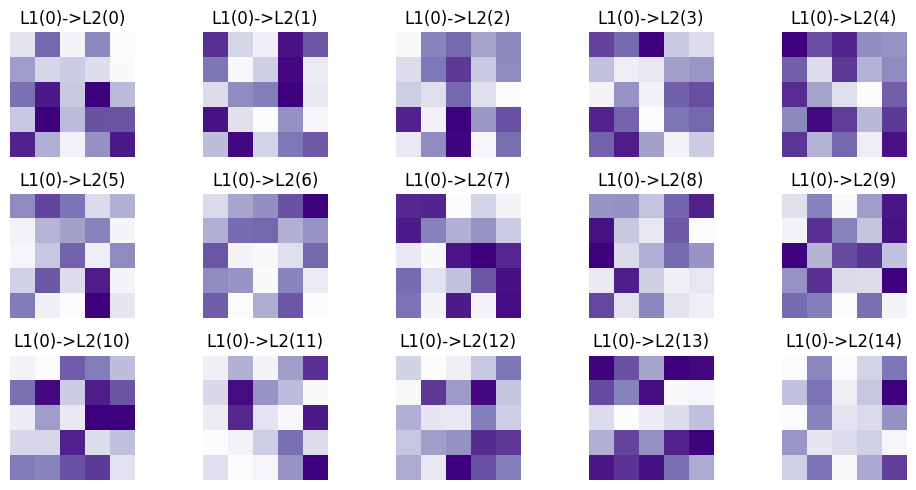

In [5]:
# visualize the kernels:

fig,axs = plt.subplots(3,5,figsize=(10,5))

for i,ax in enumerate(axs.flatten()):
  ax.imshow(torch.squeeze(c.weight[0,i,:,:]).detach(),cmap='Purples')
  ax.set_title('L1(0)->L2(%s)'%i)
  ax.axis('off')

plt.tight_layout()
plt.show()

# Convolve with an image:

torch.Size([1, 3, 64, 64])
(64, 64, 3, 1)


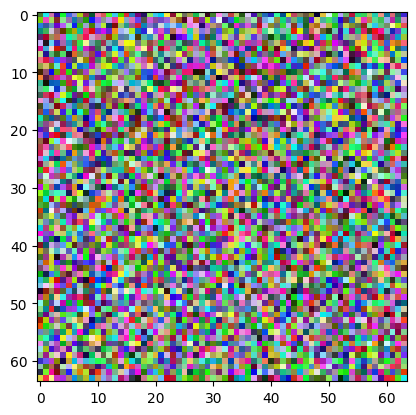

In [6]:
imsize = (1,3,64,64) # size of the image (N, RGB, H, W)
img = torch.rand(imsize)
print(img.shape)

# pytorch wants channels first, but matplotlib wants channels last, therefore, tensors must be permuted to visualize:
img2view = img.permute(2,3,1,0).numpy() # (N, RGB, H, W) -> (H, W, RGB, N)
print(img2view.shape)

plt.imshow(np.squeeze(img2view));

In [7]:
# convolve the image with the filter bank (set of 'outChans' kernels)

convRes = c(img) # call the instance of the transpose conv class with an image
print(img.shape) # input shape
print(convRes.shape) # output shape

torch.Size([1, 3, 64, 64])
torch.Size([1, 15, 68, 68])


👆 Upsampling!

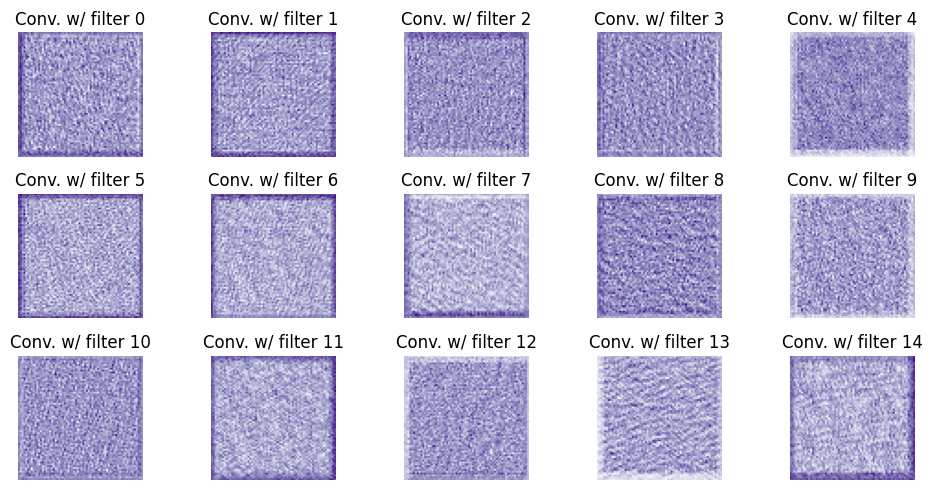

In [8]:
# visualize the convolved images:

fig,axs = plt.subplots(3,5,figsize=(10,5))

for i,ax in enumerate(axs.flatten()):
  I = torch.squeeze(convRes[0,i,:,:]).detach() # only 1 image
  ax.imshow(I,cmap='Purples')
  ax.set_title('Conv. w/ filter %s'%i)
  ax.axis('off')

plt.tight_layout()
plt.show()

👆Edge effects with transpose convolution:
- The edges of time series always get a little distorted whenever you applied any kind of filter.
- Whenever possible, make sure that your images are formatted so that the really important information is not sitting exactly at the borders.
